In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm


from galaxy_tools import load_halo, load_sim, mask_sim_to_halo, get_mock_observation
from general_tools import measure_surfbright, radius_of_param_limit

%matplotlib inline


Couldn't import numba. Missing:
abg_python.all_utils.get_cylindrical_velocities
Missing firefly, obtain it at http://github.com/ageller/Firefly or pip install firefly.


Load simulation. 

I have it set up so that the units and format work with FIREStudio

For the simulations, the halo files are in two different formats, below are two examples.

If you do not have a halo file, then just use load_sim and make sure you center the coordinates on galaxy


In [2]:
# This loads the halo file
# host=True means it only returns the host halo information, otherwise it returns all the halos
# filetype='hdf5' indicate the halo file type, some halos are filetype='ascii'
# hostnumber indicates which host halo you are looking at. Only need to worry about this for the elvis pairs.
        #use hostnumber=2 to get the halo info for the second host halo. 
        #ex: halo_themla = gal.load_halo(halo_path, snap_num, host=True, filetype='hdf5', hostnumber=1)
        #    halo_louise = gal.load_halo(halo_path, snap_num, host=True, filetype='hdf5', hostnumber=2)


# Example.................................................
# halo = gal.load_halo(halo_path, snap_num, host=True, filetype='hdf5', hostnumber=2)


# This loads the star and gas particle
# It only loads the parameters I need for the mock images

# Example.................................................
# star_snapdict, gas_snapdict = gal.load_sim(sim_path,snap_num)


# This centers star and gas dictionaries on the host halo
# If orient=True, then it will rotate the particles based on the disk orientation
# If lim=True, then it masks out the particles beyond the limvalue
    # Have lim=False if you want to carry around all the particles
    # I chose to mask out particles beyond the virial radius


# Example.................................................
# star_snapdict, gas_snapdict, halo = gal.mask_sim_to_halo(star_snapdict=star_snapdict,
                                                          #gas_snapdict=gas_snapdict, 
                                                          #host_halo=halo, 
                                                          #orient=True,
                                                          #lim = True,
                                                          #limvalue = limvalue)


In [3]:
#Example with the m10s

sim = 'm10b_res500'
#z=0 for the m10s
snap_num = 184 
#halo file type
filetype='ascii'


halo_path = '/data17/grenache/aalazar/FIRE/GVB/'+str(sim)+'/halo/rockstar_dm/catalog/'
sim_path =  '/data17/grenache/aalazar/FIRE/GVB/'+str(sim)+'/output/hdf5/snapdir_'+str(snap_num)+'/'


halo = load_halo(halo_path, snap_num, host=True, filetype=filetype)
star_snapdict, gas_snapdict = load_sim(sim_path,snap_num)  

In [4]:
#Example with the m11s

sim = 'm11a_res2100'
#z=0 for m11s
snap_num = 600
#halo file type
filetype='hdf5'


halo_path = '/data17/grenache/aalazar/FIRE/GVB/'+str(sim)+'/halo/rockstar_dm/hdf5/'
sim_path =  '/data17/grenache/aalazar/FIRE/GVB/'+str(sim)+'/output/hdf5/snapdir_'+str(snap_num)+'/'


halo = load_halo(halo_path, snap_num, host=True, filetype=filetype)
star_snapdict, gas_snapdict = load_sim(sim_path,snap_num)

In [5]:
limvalue = halo['rvir'].values[0] * 0.1 # You can play with different limit values

star_snapdict, gas_snapdict, halo = mask_sim_to_halo(star_snapdict=star_snapdict,
                                                     gas_snapdict=gas_snapdict, 
                                                     host_halo=halo, 
                                                     orient=False, #if true, then orients toward disk
                                                     lim = True, #Masks particles beyond limvalue  
                                                     limvalue = limvalue #limit radius in kpc
                                                    )

In [6]:
pixels = 1000 #image pixel size
FOV=limvalue
view='xy' #'yz','zx'
mock_image, uband, gband, rband = get_mock_observation(star_snapdict,gas_snapdict,
                                  FOV=FOV, 
                                  return_type='mock_image',
                                  pixels=pixels, 
                                  view=view,
                                  center='light')


Calculating L/M in Sloan u (BAND_ID=1,l=3551 A)
Calculating L/M in Sloan g (BAND_ID=2,l=4686 A)
Calculating L/M in Sloan r (BAND_ID=3,l=6165 A)
Projecting with attenuation...
total lum before attenuation in each band (Lsun/1e10): [0.02037181 0.01462807 0.01069984]
opacity in each band: [1585.97915621 1154.44253194  799.38644653]
total gas mass: 0.0051351109647589845
maxden ==  52622824.0  dynrange ==  912.7983347788378  minden ==  57650.0


/export/nfs0home/kleinca/fire_tools/FIRE_studio/firestudio/utils/stellar_utils/make_threeband_image.py:129: RuntimeWarning: divide by zero encountered in log10
  f_i = np.log10(i/minnorm) / np.log10(maxnorm/minnorm);
/export/nfs0home/kleinca/fire_tools/FIRE_studio/firestudio/utils/stellar_utils/make_threeband_image.py:137: RuntimeWarning: divide by zero encountered in log
  r = np.log(r/minnorm) / np.log(maxnorm/minnorm);
/export/nfs0home/kleinca/fire_tools/FIRE_studio/firestudio/utils/stellar_utils/make_threeband_image.py:138: RuntimeWarning: divide by zero encountered in log
  g = np.log(g/minnorm) / np.log(maxnorm/minnorm);
/export/nfs0home/kleinca/fire_tools/FIRE_studio/firestudio/utils/stellar_utils/make_threeband_image.py:139: RuntimeWarning: divide by zero encountered in log
  b = np.log(b/minnorm) / np.log(maxnorm/minnorm);


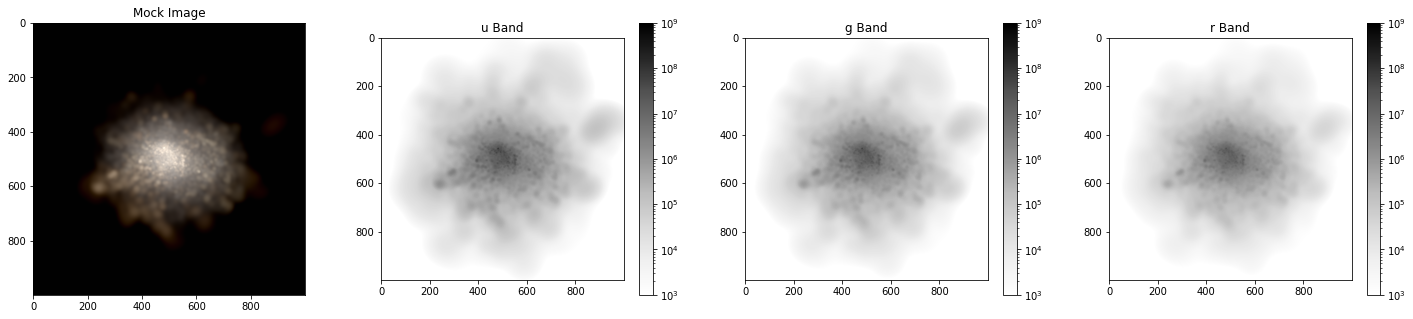

In [7]:
fig, axs = plt.subplots(1,4,figsize=(25, 5))

vmin = 1e3
vmax = 1e9

norm=LogNorm(vmin=vmin, vmax=vmax)

simim = axs[0].imshow( mock_image )
axs[0].set_title('Mock Image')

simim = axs[1].imshow(uband, norm=LogNorm(vmin=vmin, vmax=vmax), cmap='Greys')
fig.colorbar(simim, ax=axs[1])
axs[1].set_title('u Band')

simim = axs[2].imshow(gband, norm=LogNorm(vmin=vmin, vmax=vmax), cmap='Greys')
fig.colorbar(simim, ax=axs[2])
axs[2].set_title('g Band')

simim = axs[3].imshow(rband, norm=LogNorm(vmin=vmin, vmax=vmax), cmap='Greys')
fig.colorbar(simim, ax=axs[3])
axs[3].set_title('r Band')
plt.show()



In [8]:
#Measures the luminosity enclosed in each radius
#Can alter return_type to other options like surfacebrightness
#You can choose which which band to use, I use g-band

radius,cumulative_light = measure_surfbright(gband,FOV,return_type='cum_lum')

The half light radius is: 1.35 kpc


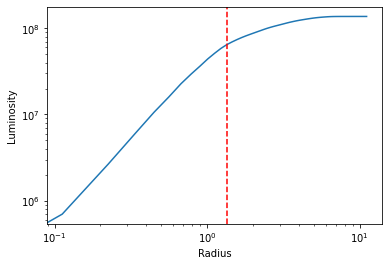

In [9]:
#Identifies the radius that contains half (.5) the luminosity 
radius_measure, param_measure = radius_of_param_limit(radius,cumulative_light,limits=[.5],limit_type='param_cum')

plt.plot(radius,cumulative_light)
plt.axvline(x=radius_measure, color='r', linestyle='--')

plt.xlabel('Radius')
plt.ylabel('Luminosity')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

print(f'The half light radius is: {radius_measure[0]:.2f} kpc')
